<a href="https://www.kaggle.com/code/fcaner/world-happiness-data-visualization?scriptVersionId=101567157" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

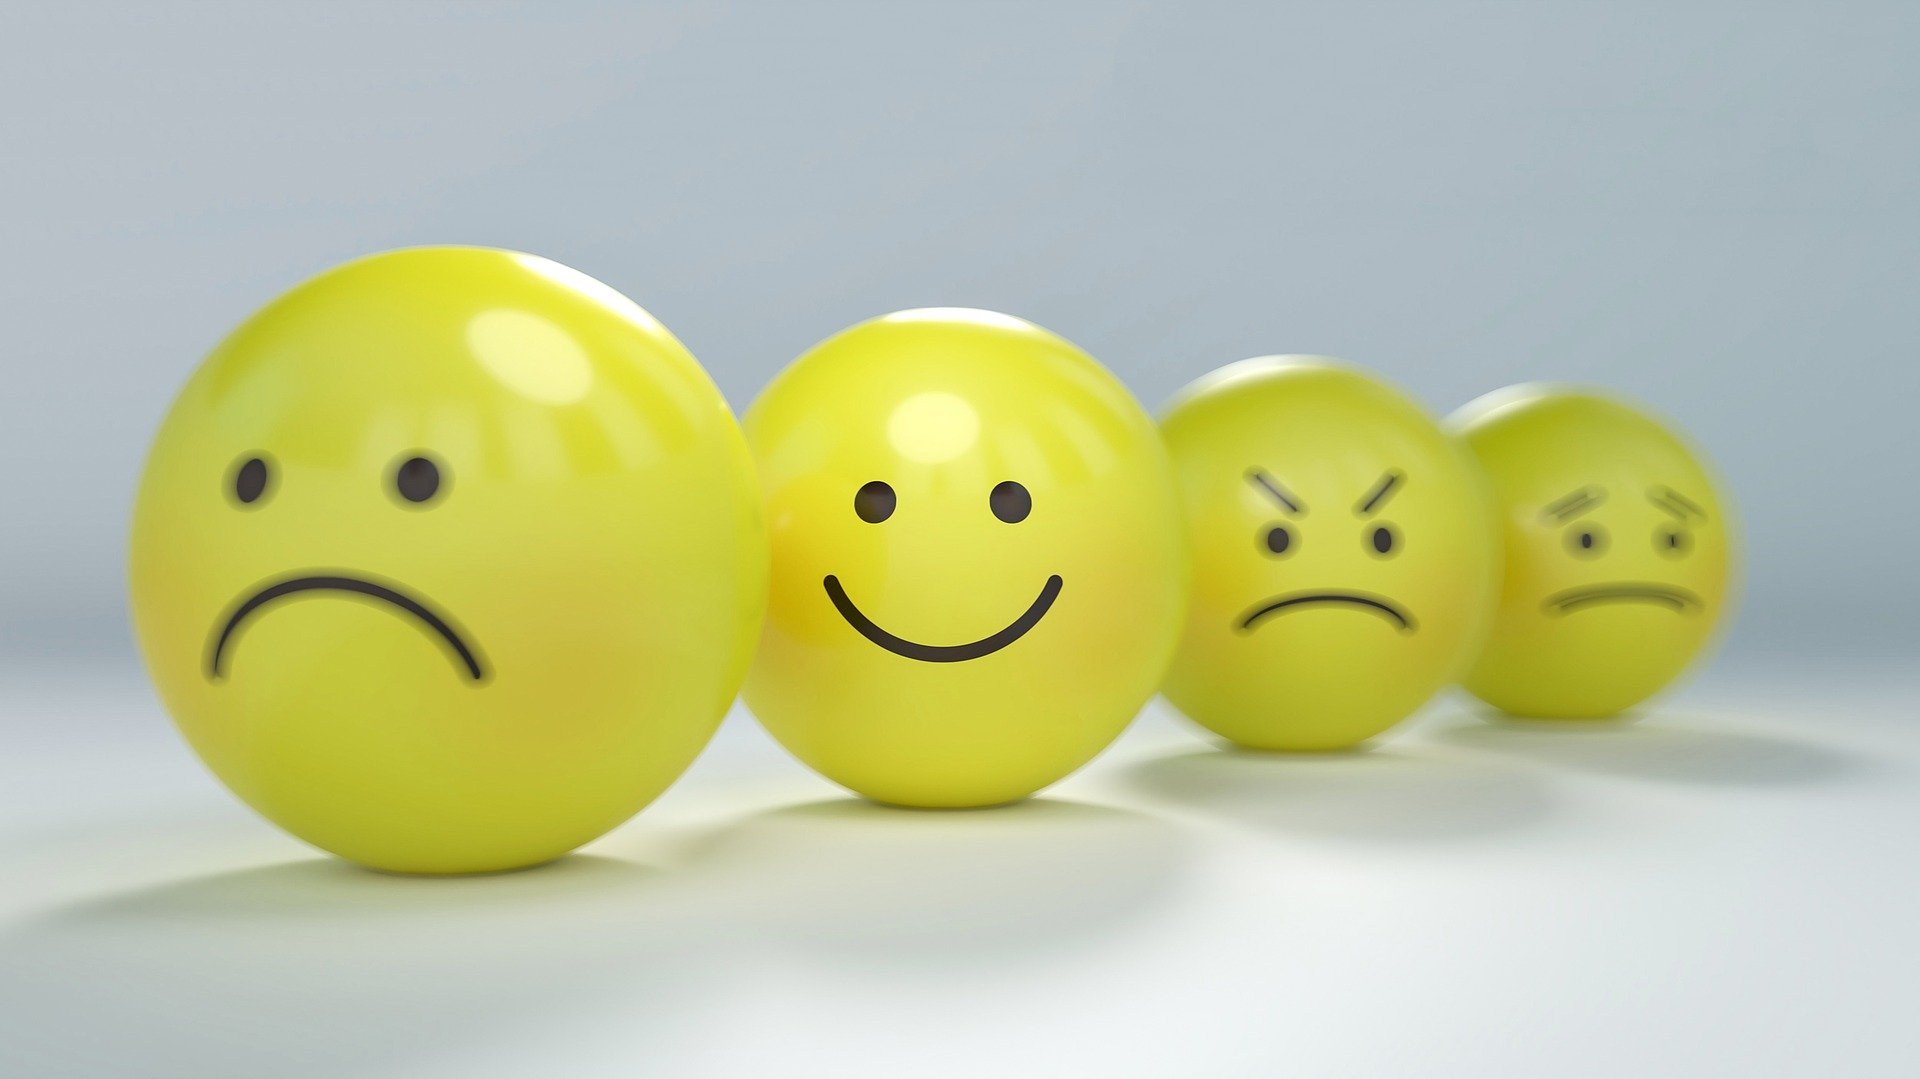

# Contents
1. [Data Import & Check](#Data-Import-&-Check)
2. [Correlation Map](#Correlation-Map)
3. [Bubble Chart](#Bubble-Chart)
4. [Vertical Bar Plot](#Vertical-Bar-Plot)
5. [Horizontal Bar Plot](#Horizontal-Bar-Plot)
6. [Pie Chart](#Pie-Chart)
7. [Line Plot](#Line-Plot)


#### I hope you like the kernel. Please share your suggestions :)

<a id="Data-Import-&-Check"></a>
# 1. Data Import & Check

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import difflib
pd.set_option('display.max_columns', 500)
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn import preprocessing
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df_2015 = pd.read_csv("../input/world-happiness-report/2015.csv")
df_2016 = pd.read_csv("../input/world-happiness-report/2016.csv")
df_2017 = pd.read_csv("../input/world-happiness-report/2017.csv")
df_2018 = pd.read_csv("../input/world-happiness-report/2018.csv")
df_2019 = pd.read_csv("../input/world-happiness-report/2019.csv")
df_2020 = pd.read_csv("../input/world-happiness-report/2020.csv")

In [3]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

In [4]:
df_2020.head(5)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [5]:
df_2020.tail(5)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751
152,Afghanistan,South Asia,2.5669,0.031311,2.628270,2.505530,7.462861,0.470367,52.590000,0.396573,-0.096429,0.933687,1.972317,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226,1.507236


<a id="Correlation-Map"></a>
# 2. Correlation Map

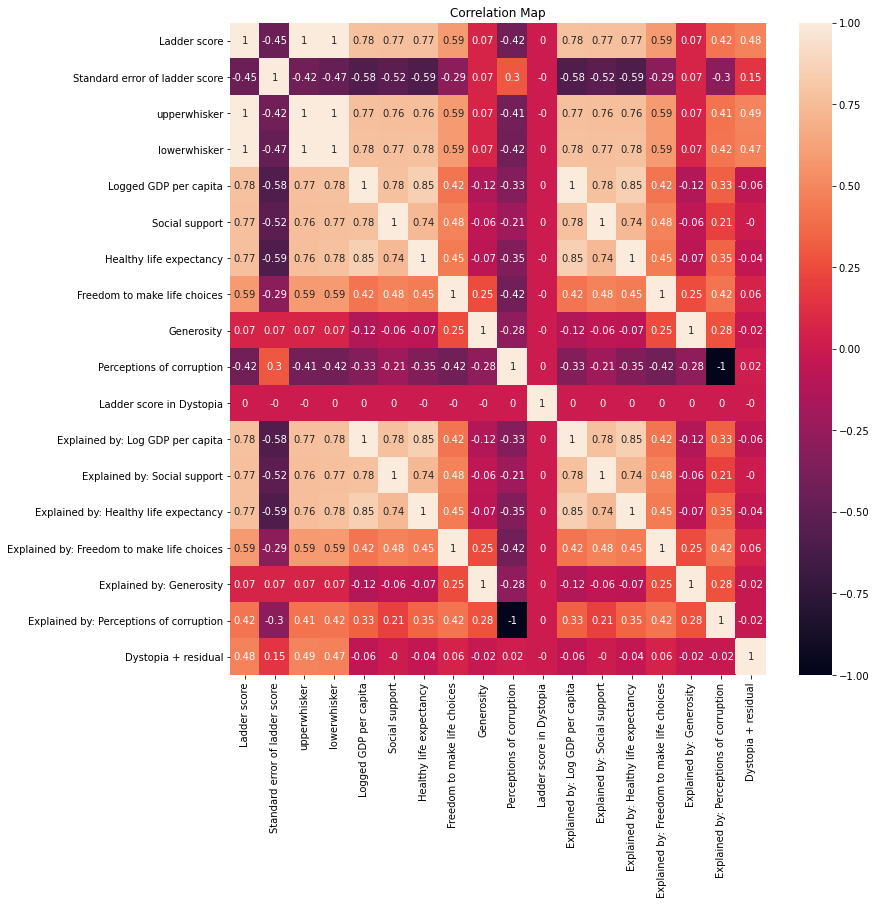

In [6]:
corrMatrix = df_2020.corr()
fig, ax = plt.subplots(figsize=(12,12))
sn.heatmap(corrMatrix.round(2), annot=True)
plt.title("Correlation Map")
plt.show()

<a id="Bubble-Chart"></a>
# 3. Bubble Chart

In [7]:
fig = go.Figure(data = [go.Scatter(
    x = df_2020["Logged GDP per capita"],
    y = df_2020["Ladder score"], mode = 'markers',
    text = list(df_2020["Country name"]),
    marker_size = df_2020["Ladder score"]*2,
    marker = dict(
            color="green",
            opacity=[0.9]
    )
)])
fig.update_layout(
    title='GDP & Happiness Comparison',
    xaxis=dict(
        title='GDP',
        gridcolor='white',
        gridwidth=1,
    ),
    yaxis=dict(
        title='Ladder Score',
        gridcolor='white',
        gridwidth=1,
    )
)

fig.show()


<a id="Vertical-Bar-Plot"></a>
# 4. Vertical Bar Plot

<Figure size 432x288 with 0 Axes>

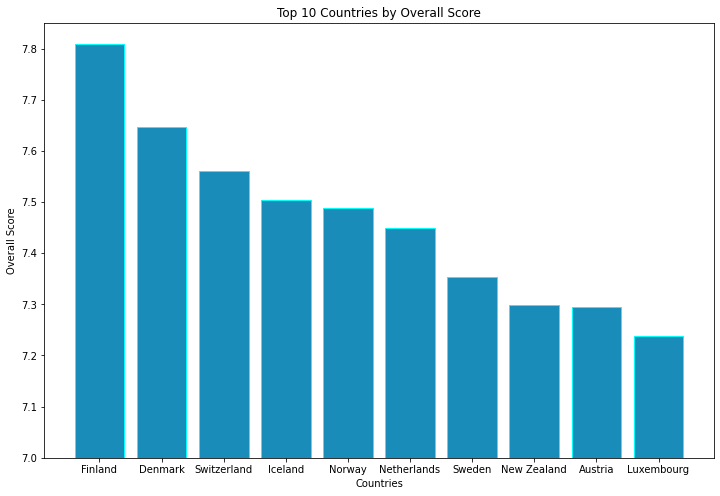

In [8]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(12,8))
countries = df_2020.iloc[0:10,0]
score = df_2020.iloc[0:10,2]
plt.bar(countries,score, color=(0, 0.5, 0.7, 0.9), edgecolor= 'cyan')
plt.xlabel("Countries")
plt.ylabel("Overall Score")
plt.title("Top 10 Countries by Overall Score")
plt.ylim(7,7.85)

plt.show()

<a id="Horizontal-Bar-Plot"></a>
# 5. Horizontal Bar Plot

In [9]:
print("2015 Freedom Score: {}".format(round(df_2015["Freedom"].mean(),2)))
print("2016 Freedom Score: {}".format(round(df_2016["Freedom"].mean(),2)))
print("2017 Freedom Score: {}".format(round(df_2017["Freedom"].mean(),2)))
print("2018 Freedom Score: {}".format(round(df_2018["Freedom to make life choices"].mean(),2)))
print("2019 Freedom Score: {}".format(round(df_2019["Freedom to make life choices"].mean(),2)))
print("2020 Freedom Score: {}".format(round(df_2020["Freedom to make life choices"].mean(),2)))

2015 Freedom Score: 0.43
2016 Freedom Score: 0.37
2017 Freedom Score: 0.41
2018 Freedom Score: 0.45
2019 Freedom Score: 0.39
2020 Freedom Score: 0.78


<Figure size 432x288 with 0 Axes>

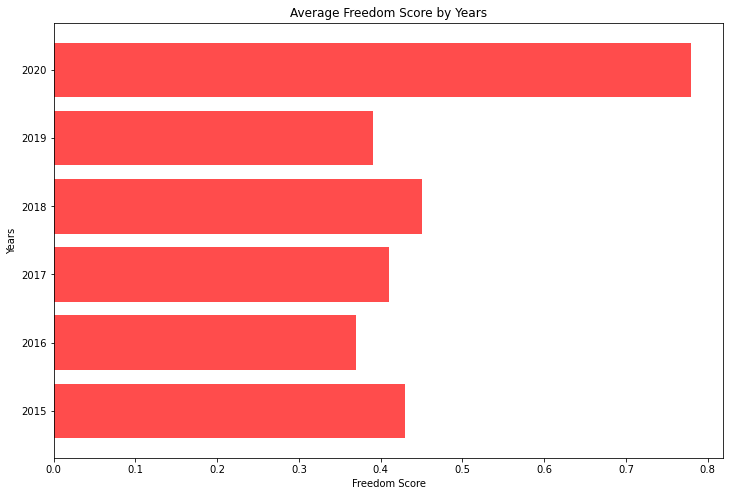

In [10]:
y_axis = ["2015", "2016", "2017", "2018", "2019", "2020"]
x_axis = [round(df_2015["Freedom"].mean(),2), round(df_2016["Freedom"].mean(),2), round(df_2017["Freedom"].mean(),2),round(df_2018["Freedom to make life choices"].mean(),2), 
          round(df_2019["Freedom to make life choices"].mean(),2), round(df_2020["Freedom to make life choices"].mean(),2)]
fig = plt.figure()
fig, ax = plt.subplots(figsize=(12,8))
plt.barh(y_axis, x_axis, align='center', color = 'r', alpha = 0.7)
plt.xlabel("Freedom Score")
plt.ylabel("Years")
plt.title("Average Freedom Score by Years")
plt.show()


<a id="Pie-Chart"></a>
# 6. Pie Chart

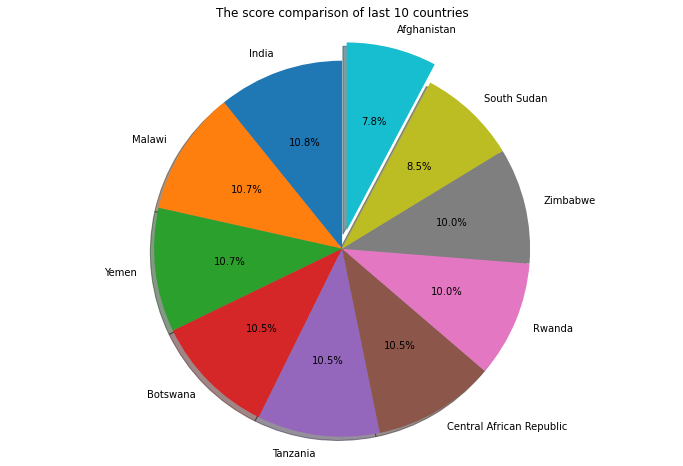

In [11]:
last10_countryname = df_2020["Country name"].iloc[-10:]
last10_countryscore = df_2020["Ladder score"].iloc[-10:]
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(last10_countryscore, explode = (0,0,0,0,0,0,0,0,0,0.1), labels=last10_countryname, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("The score comparison of last 10 countries")
plt.show()

<a id="Line-Plot"></a>
# 7. Line Plot

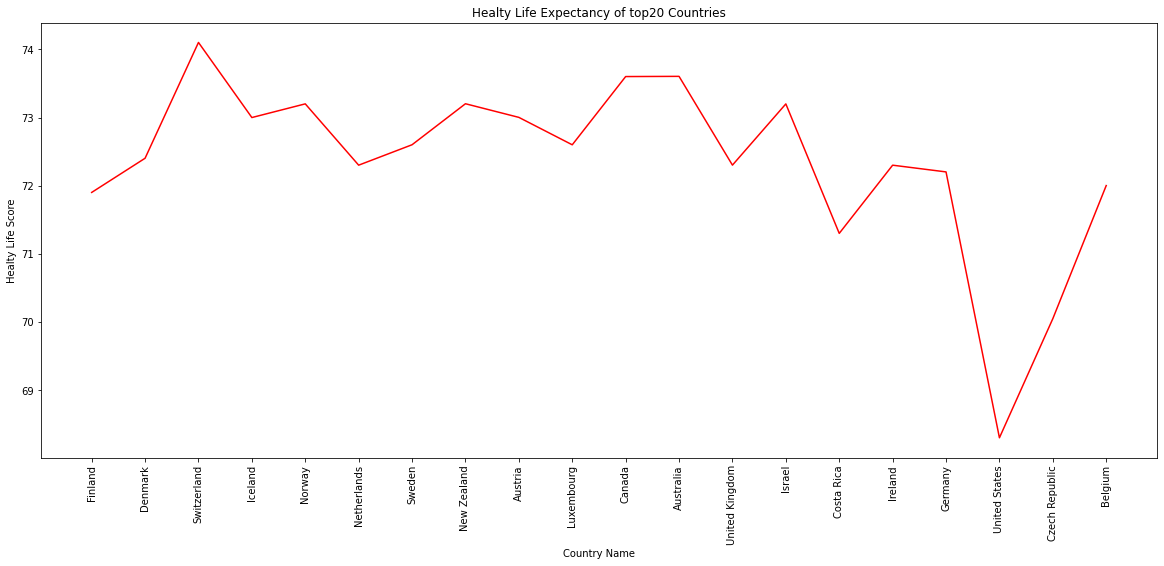

In [12]:
values = df_2020.iloc[0:20,8]
fig2, ax2 = plt.subplots(figsize=(20,8))
plt.xlabel("Country Name")
plt.ylabel("Healty Life Score")
plt.plot(df_2020.iloc[0:20,0], values, color = 'r')
plt.xticks(df_2020.iloc[0:20,0], rotation='vertical')
plt.title("Healty Life Expectancy of top20 Countries")
plt.show()

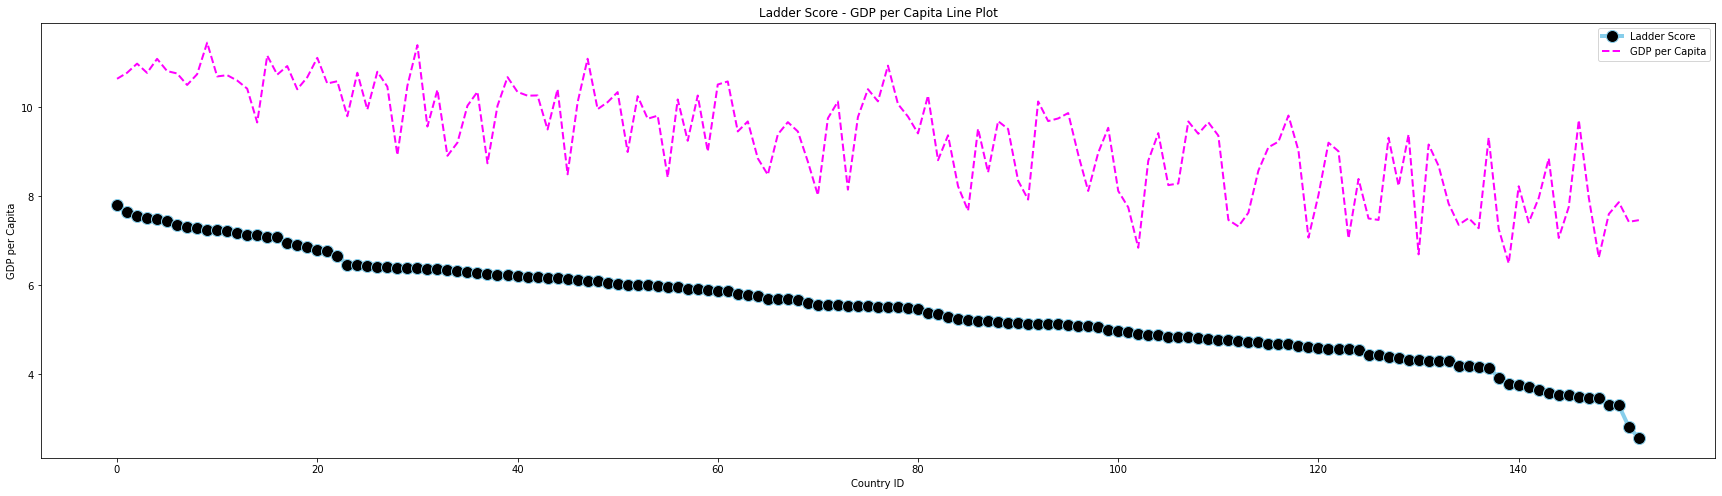

In [13]:

plt.figure(figsize=(30,8))
plt.plot(df_2020["Ladder score"], marker='o', markerfacecolor='black', markersize=12, color='skyblue', linewidth=4, label="Ladder Score")
plt.plot(df_2020["Logged GDP per capita"], marker='', color='magenta', linewidth=2, linestyle='dashed', label="GDP per Capita")
plt.xlabel("Country ID")
plt.ylabel("GDP per Capita")
plt.title("Ladder Score - GDP per Capita Line Plot")
plt.legend()
